# Visualising earnings based on college majors

### Dataset 

*Source*

Dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors) cleaned the dataset and released it on their Github repo.

*Description*

Column Title | Description
---|---
 Rank | Rank by median earnings (the dataset is ordered by this column)
 Major_code | Major code
Major | Major description.
Major_category | Category of major.
Total | Total number of people with major.
Sample_size | Sample size (unweighted) of full-time.
Men | Male graduates.
Women | Female graduates.
ShareWomen | Women as share of total.
Employed | Number employed.
Median | Median salary of full-time, year-round workers.
Low_wage_jobs | Number in low-wage service jobs.
Full_time | Number employed 35 hours or more.
Part_time | Number employed less than 35 hours.

## Setting up the envionment

In [1]:
import pandas as pd
import matplotlib as plt

%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
#show first row as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
#display first 5 rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
#display last 5 rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
#count number of rows
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [7]:
#drop rows with null values
recent_grads = recent_grads.dropna()

In [8]:
#count number of rows
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


Result: one row was dropped.

## Plotting relationships

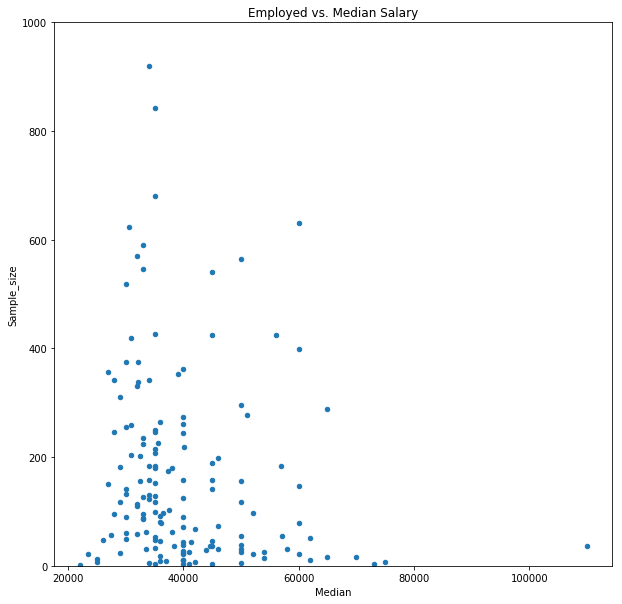

In [9]:
#plot the median salary of the employed students
recent_grads.plot(y='Sample_size', 
                  x='Median', 
                  kind='scatter',
                  title='Employed vs. Median Salary', 
                  figsize=(10,10), 
                  ylim=(0,1000)
                 )


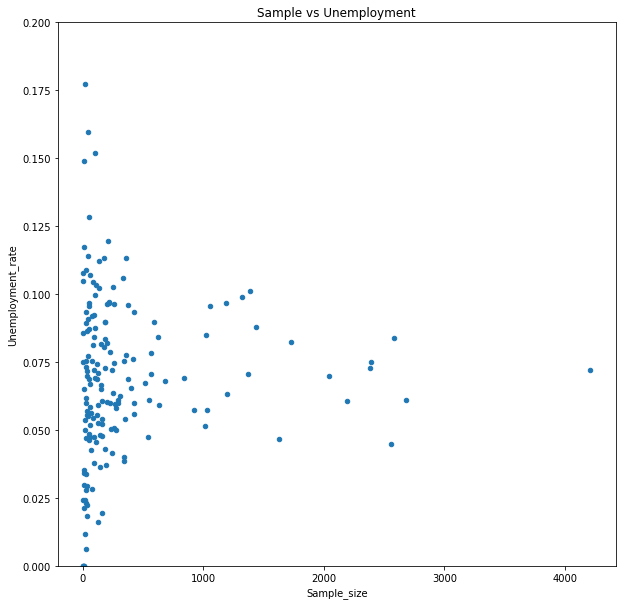

In [10]:
#plot the unemployment rate
recent_grads.plot(x ="Sample_size",
                  y ="Unemployment_rate",
                  kind ="scatter",
                  title ="Sample vs Unemployment",
                  figsize= (10,10),
                  ylim =(0,0.2))

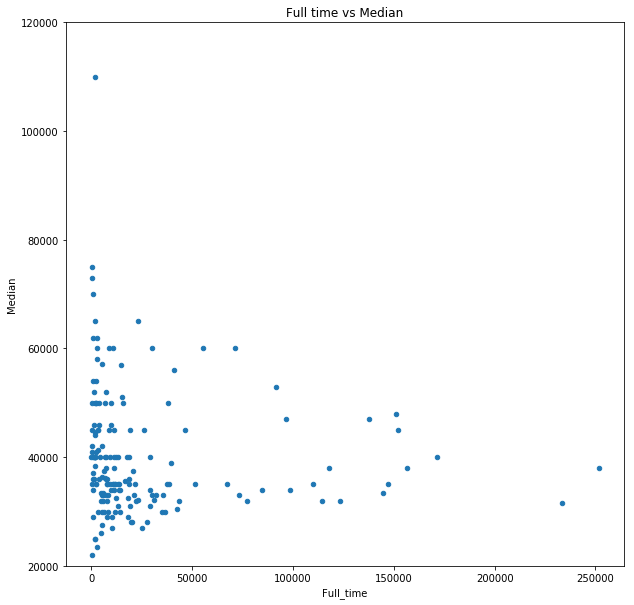

In [11]:
#plot number of full time employed vs median salary
recent_grads.plot(x ="Full_time", 
                  y ="Median",
                  kind ="scatter",
                  title ="Full time vs Median",
                  figsize= (10,10),
                  ylim =(20000,120000))

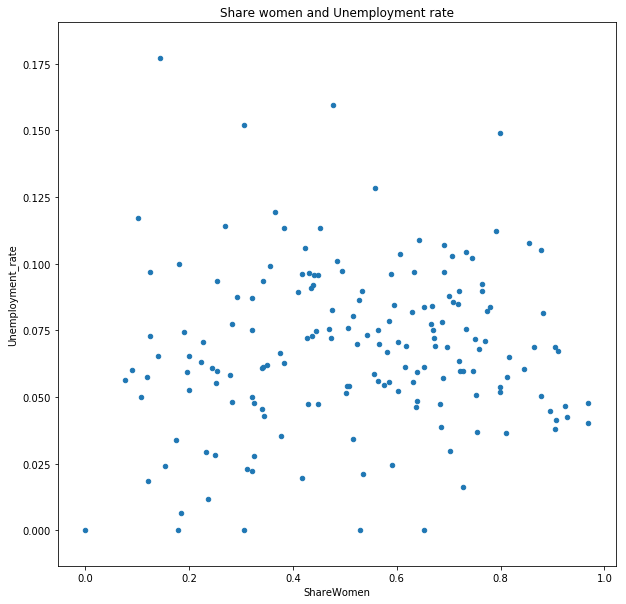

In [12]:
#plot unemployment rate in female grads
recent_grads.plot(x ="ShareWomen", 
                  y ="Unemployment_rate", 
                  kind ="scatter", 
                  title ="Share women and Unemployment rate", 
                  figsize= (10,10))

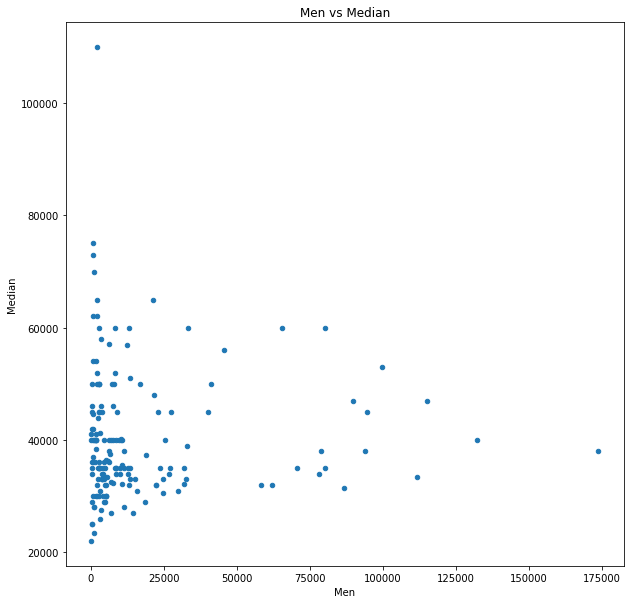

In [13]:
#plot median salary of male graduates
recent_grads.plot(x ="Men", 
                  y ="Median", 
                  kind ="scatter", 
                  title ="Men vs Median", 
                  figsize= (10,10))

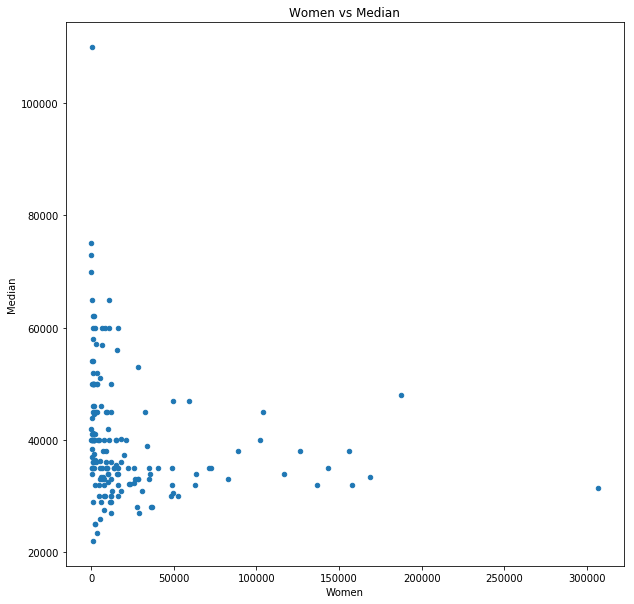

In [14]:
#plot median earnings of women 
recent_grads.plot(x ="Women", 
                  y ="Median", 
                  kind ="scatter", 
                  title ="Women vs Median", 
                  figsize= (10,10))

To see if people with more popular majors make more money we plot `Total` (number of people with a specific major) and `Median` salaries.

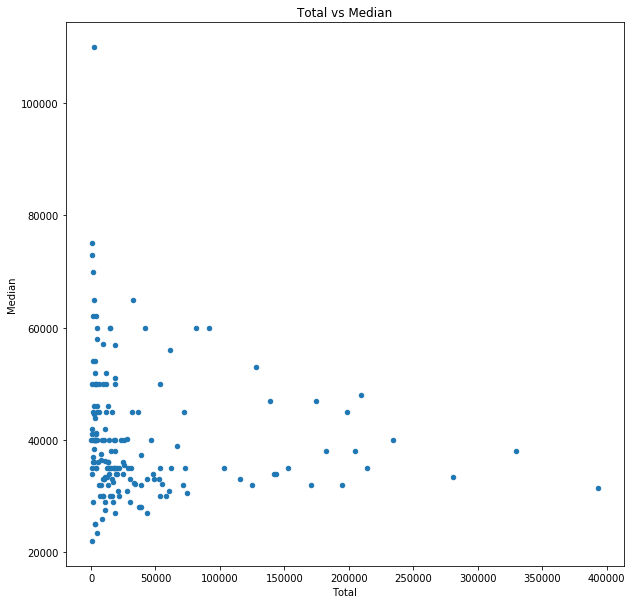

In [15]:
recent_grads.plot(x ="Total", 
                  y ="Median", 
                  kind ="scatter", 
                  title ="Total vs Median", 
                  figsize= (10,10))


It appears that students with more popular majors do not make more money. Most students take majors that are less popular, and that's the part of the plot where most of the different salary values fall. Highest earning majors are among the least ppular ones, but it's not the case that the less popular the major, the more one would earn.

Text(0.5, 1.0, 'Median')

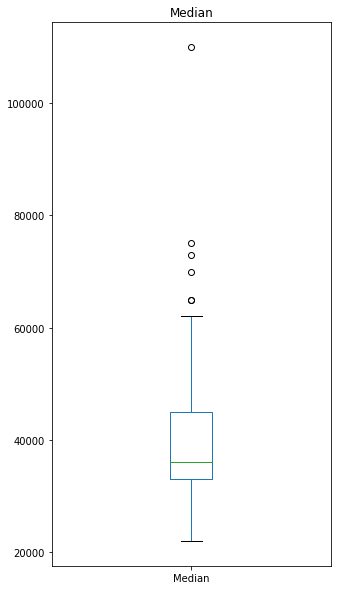

In [16]:
#create a box plot of median salaries to see how they are distributed
ax1 = recent_grads.plot(y="Median", kind ="box", figsize = (5,10))

ax1.set_title("Median")

Most values fall between around 35,000 and 45,000. There are more outliers in the higher earning group.

## Male vs Female subjects

In this part we explore differences between subjects that had majority male and female students. 

In [17]:
# finds subjects that were majority female
women_popular = recent_grads.loc[recent_grads['Men'] <= recent_grads['Women']]                                                                                                              
men_popular = recent_grads.loc[recent_grads['Men'] >= recent_grads['Women']]                    

#mean earnings for majority female subjects rouned to 2
mean_women_popular = round(women_popular["Median"].mean(),2)
mean_men_popular = round(men_popular["Median"].mean(), 2)

print("The mean earnings for female dominated subjects are ", mean_women_popular, " and the mean earnings for male dominated subjects are ", mean_men_popular)
                                                                     

The mean earnings for female dominated subjects are  34605.21  and the mean earnings for male dominated subjects are  46988.16


Male dominated subjects have higher postgrad earnings. 

It is unsure if it's the choice of the subject that influences the earnings, or it is that males would tend to earn more regardless of the subject. 

Text(0.5, 1.0, 'Median earnings for female-dominated subjects')

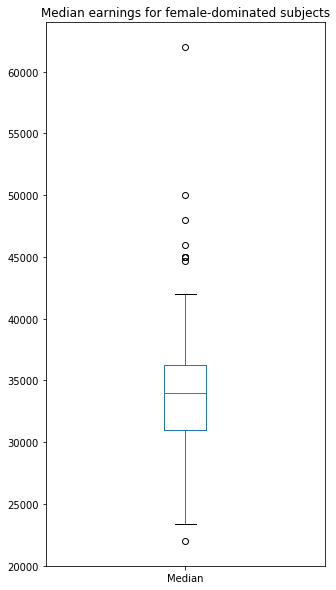

In [18]:
#box plot of median earnings for female-dominated majors
ax1 = women_popular.plot(y="Median", kind="box", figsize= (5,10), return_type = 'axes')
ax1.set_title("Median earnings for female-dominated subjects")

Text(0.5, 1.0, 'Median earnings for male-dominated subjects')

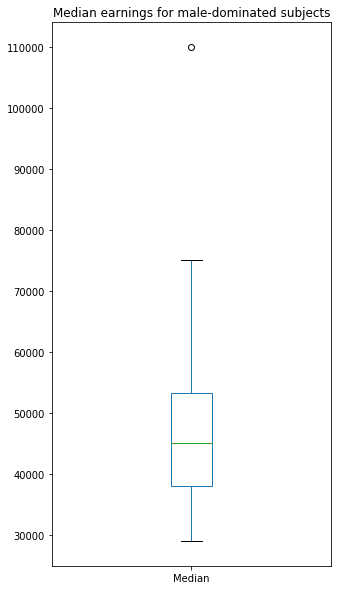

In [19]:
#box plot of median earnings for male-dominated majors
ax2 = men_popular.plot(y="Median", kind="box", figsize= (5,10))
ax2.set_title("Median earnings for male-dominated subjects")

**Conclusions:**

The median earnings for "female subjects" have a median around 34,000. The greatest value (end of upper whisker) is around 42,500. 
There are more outliers in this distribution, one on the lower end and on the upper end. The min value before the outlier is around 23,000.

The median earnings for "male subjects" have a median around 42,000. The greatest value (end of upper whisker) is around 72,500. The min value (bottom whisker) is 30,000. There is one outlier towards the upper end of the values, earning 110,000

Graduands of majors that were feale dominated earn significantly lower wages. 

### Popular majors
To define the popular majors we look at the distribution of all values.

In [20]:
recent_grads["Total"].describe()

count       172.000000
mean      39370.081395
std       63483.491009
min         124.000000
25%        4549.750000
50%       15104.000000
75%       38909.750000
max      393735.000000
Name: Total, dtype: float64

Any major that has a number of students belonging to the upper quartile—that is higher than the mean (> 38,909.75)—we can consider popular. 

In [21]:
#divide the total into two groups
#one with popular majors, anotehr with the rest of majors, aka non-popular
pop_majors = recent_grads.loc[recent_grads["Total"]>38909.75]
not_pop_majors = recent_grads.loc[recent_grads["Total"]<38909.75]

#calculate mean earnings for each group, round to 2 digits
pop_mean = round(pop_majors["Median"].mean(),2)
not_pop_mean = round(not_pop_majors["Median"].mean(),2)

print("Student with popular majors make on average", pop_mean, "while other students make", not_pop_mean, "on average.")

Student with popular majors make on average 38581.4 while other students make 40575.19 on average.


In [22]:
print("There is a", round(not_pop_mean-pop_mean,2), "diffrence in average earnings between not popular and popular majors.")

There is a 1993.79 diffrence in average earnings between not popular and popular majors.


Popularity of a major doesn't come with increased earnings. It's rather the graduants of non popular majors who earn more on average. We can see this also from the same scatter plot as we displayed before.

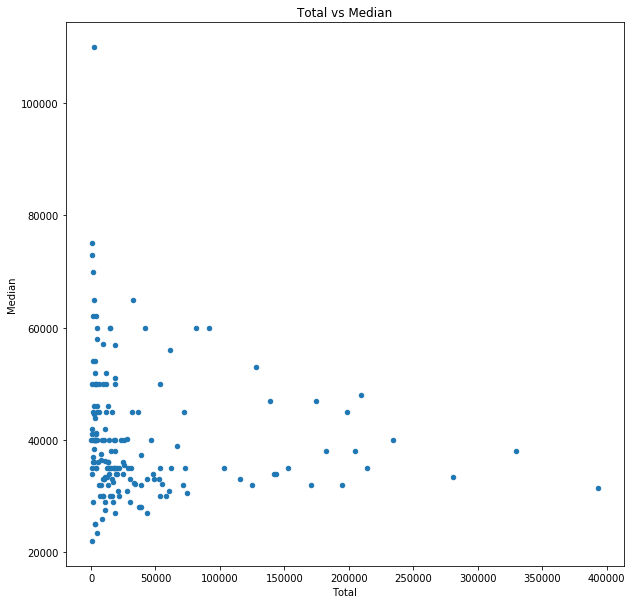

In [23]:
recent_grads.plot(x ="Total", 
                  y ="Median", 
                  kind ="scatter", 
                  title ="Total vs Median", 
                  figsize= (10,10))


### Exploring column distributions

We'll explore the distributions of diffrent columns.

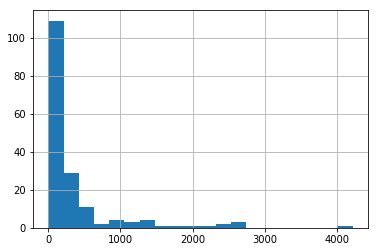

In [54]:
#histogram of the sample size
recent_grads["Sample_size"].hist(bins=20)

The majority of the distrubution falls in the first bin. 

#### Median salary
Exploring information about median salaries.

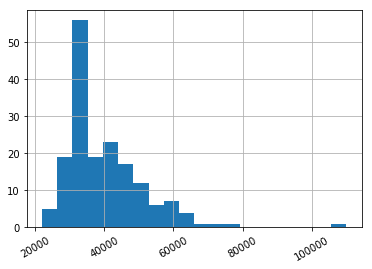

In [55]:
#histogram of the median salary
recent_grads["Median"].hist(xrot = 30,bins=20)

In [56]:
#show bin values and sort by popularity
recent_grads["Median"].value_counts(bins=20,normalize= True, ascending=False)

(30800.0, 35200.0]      0.325581
(39600.0, 44000.0]      0.139535
(26400.0, 30800.0]      0.110465
(35200.0, 39600.0]      0.110465
(44000.0, 48400.0]      0.093023
(48400.0, 52800.0]      0.069767
(57200.0, 61600.0]      0.040698
(52800.0, 57200.0]      0.034884
(21911.999, 26400.0]    0.029070
(61600.0, 66000.0]      0.023256
(66000.0, 70400.0]      0.005814
(70400.0, 74800.0]      0.005814
(74800.0, 79200.0]      0.005814
(105600.0, 110000.0]    0.005814
(101200.0, 105600.0]    0.000000
(79200.0, 83600.0]      0.000000
(83600.0, 88000.0]      0.000000
(88000.0, 92400.0]      0.000000
(92400.0, 96800.0]      0.000000
(96800.0, 101200.0]     0.000000
Name: Median, dtype: float64

The most common median salary is between 30800 and 35200. Around 33% of the graduants fallinto this salary group.

#### Different employment types

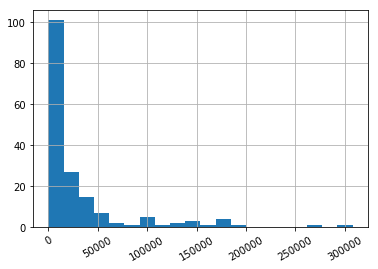

In [65]:
#histogram of the employed
recent_grads["Employed"].hist(xrot = 30, bins=20)

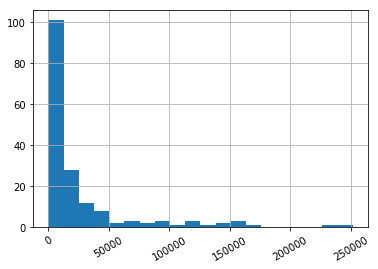

In [67]:
#histogram of the full time column
recent_grads["Full_time"].hist(xrot=30, bins=20)

Just over 100 majors, have between 0 and 125,000 graduants employed 35 hours or more per week. 

#### Gender differences

What kind of % share of female students did the majors have.

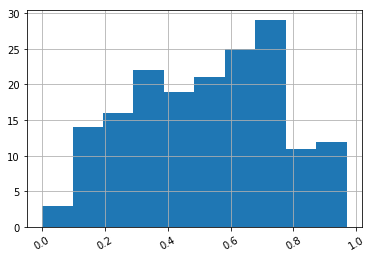

In [64]:
#histogram of share women
recent_grads["ShareWomen"].hist(xrot=30)

Almost 30 majors had 70% of female students. 
There were around 12 majors with 90% of females, and around 3 majors with females constituting just 10% of the students.

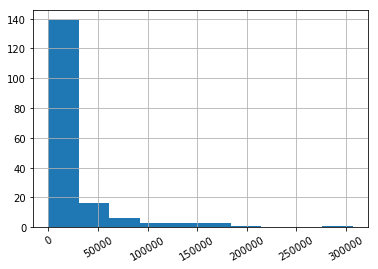

In [68]:
#histogram of men
recent_grads["Women"].hist(xrot=30, bins=10)

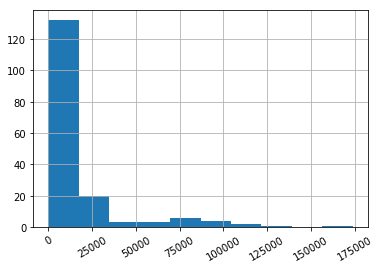

In [62]:
#histogram of men
recent_grads["Men"].hist(xrot=30, bins=10)

In [71]:
#check the bin boundaries for the distribution of men
recent_grads["Men"].value_counts(normalize=True, bins=20, ascending=False)

(-54.690999999999995, 8803.5]    0.627907
(8803.5, 17488.0]                0.139535
(17488.0, 26172.5]               0.063953
(26172.5, 34857.0]               0.052326
(78279.5, 86964.0]               0.023256
(86964.0, 95648.5]               0.017442
(69595.0, 78279.5]               0.011628
(60910.5, 69595.0]               0.011628
(34857.0, 43541.5]               0.011628
(113017.5, 121702.0]             0.005814
(104333.0, 113017.5]             0.005814
(95648.5, 104333.0]              0.005814
(52226.0, 60910.5]               0.005814
(43541.5, 52226.0]               0.005814
(130386.5, 139071.0]             0.005814
(165124.5, 173809.0]             0.005814
(121702.0, 130386.5]             0.000000
(156440.0, 165124.5]             0.000000
(139071.0, 147755.5]             0.000000
(147755.5, 156440.0]             0.000000
Name: Men, dtype: float64

~63% of the majors had the number of male graduants between 0 and 8804. (Rounding up 8803.5)

In [72]:
#check the bin boundaries for the distribution of women
recent_grads["Women"].value_counts(normalize=True, bins=20, ascending=False)

(-307.08799999999997, 15354.35]    0.674419
(15354.35, 30708.7]                0.133721
(30708.7, 46063.05]                0.052326
(46063.05, 61417.4]                0.040698
(61417.4, 76771.75]                0.023256
(122834.8, 138189.15]              0.011628
(76771.75, 92126.1]                0.011628
(92126.1, 107480.45]               0.011628
(153543.5, 168897.85]              0.011628
(107480.45, 122834.8]              0.005814
(291732.65, 307087.0]              0.005814
(168897.85, 184252.2]              0.005814
(184252.2, 199606.55]              0.005814
(138189.15, 153543.5]              0.005814
(276378.3, 291732.65]              0.000000
(199606.55, 214960.9]              0.000000
(214960.9, 230315.25]              0.000000
(230315.25, 245669.6]              0.000000
(245669.6, 261023.95]              0.000000
(261023.95, 276378.3]              0.000000
Name: Women, dtype: float64

~67% of the majors had the number of female graduants between 0 and 15,355. (Rounding up the value 15354.35)

In [73]:
#find subjects that were majority female
women_popular.describe()                                                    

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000
mean,113.312500,4168.406250,43534.041667,12926.822917,30607.218750,0.696969,367.354167,34671.812500,27800.968750,10881.697917,20862.520833,2583.906250,0.067831,34605.208333,25850.520833,44900.000000,14549.500000,14808.895833,4708.25000
std,40.724572,1573.393346,66603.741844,21245.182271,48492.530233,0.121616,592.404769,52970.986842,42901.494155,16954.999759,32893.797281,4208.870307,0.025545,6055.052171,4880.916085,10797.563078,25597.965184,23373.092224,7583.87632
min,8.000000,1103.000000,804.000000,119.000000,524.000000,0.502846,2.000000,703.000000,593.000000,0.000000,410.000000,0.000000,0.000000,22000.000000,19200.000000,22000.000000,162.000000,184.000000,0.00000
25%,86.250000,2601.750000,9319.000000,1993.750000,5809.000000,0.599866,54.500000,7052.000000,5158.500000,2211.000000,3513.250000,405.500000,0.052149,31000.000000,23000.000000,40000.000000,2325.750000,2403.750000,723.50000
50%,120.500000,4001.500000,18604.500000,4750.500000,12204.000000,0.689555,137.000000,14577.500000,11384.500000,5021.500000,8265.000000,1077.500000,0.068642,34000.000000,25000.000000,42500.000000,5494.500000,6921.000000,1880.00000
75%,147.500000,5530.000000,44796.750000,12841.750000,31444.750000,0.771820,344.750000,37011.250000,29092.500000,13091.750000,20917.250000,2737.500000,0.083905,36250.000000,29000.000000,47250.000000,16221.250000,15211.750000,5155.75000
max,173.000000,6211.000000,393735.000000,111762.000000,307087.000000,0.968954,2684.000000,307933.000000,233205.000000,115172.000000,174438.000000,28169.000000,0.149048,62000.000000,41000.000000,109000.000000,151643.000000,141860.000000,48207.00000


There are 96 majors that are more popular among women then men. More popular meaning, out of all the students taking the major more than 50% are female. 

In [75]:
#check the number of majors
recent_grads.shape[0]

172

Out of 172 majors listed 96 are more popular among females.

In [78]:
#calculate the % of majors popular among eachc gender
fem_percent = 9600/172
fem_round = round(fem_percent, 2)
mal_percent = 100 - fem_percent
mal_round = round(mal_percent,2)

print("Out of all majors", fem_round, "% are predomiantly female and ", mal_round, "% are predominantly male.")


Out of all majors 55.81 % are predomiantly female and  44.19 % are predominantly male.


### Explore relationships between two variables

In [38]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a909208>,
      dtype=object)

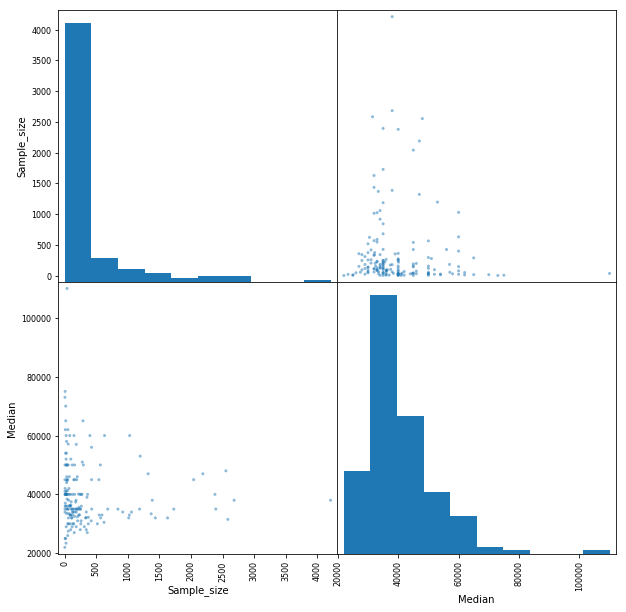

In [79]:
scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9480b8>,
      dtype=object)

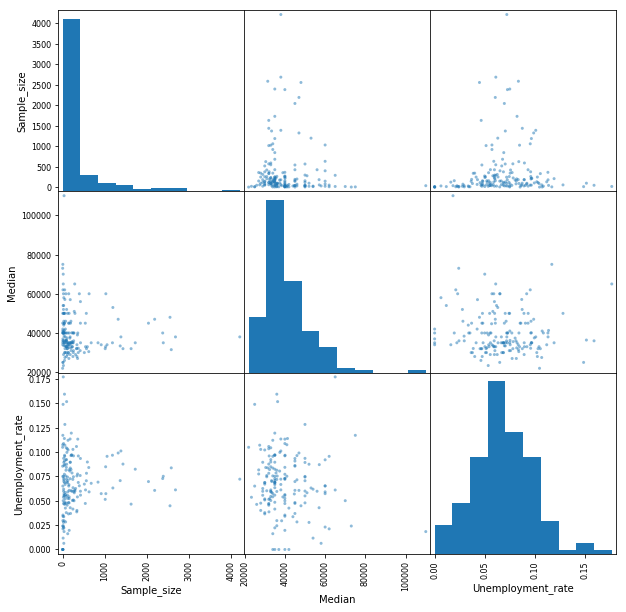

In [80]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11af98e10>,
      dtype=object)

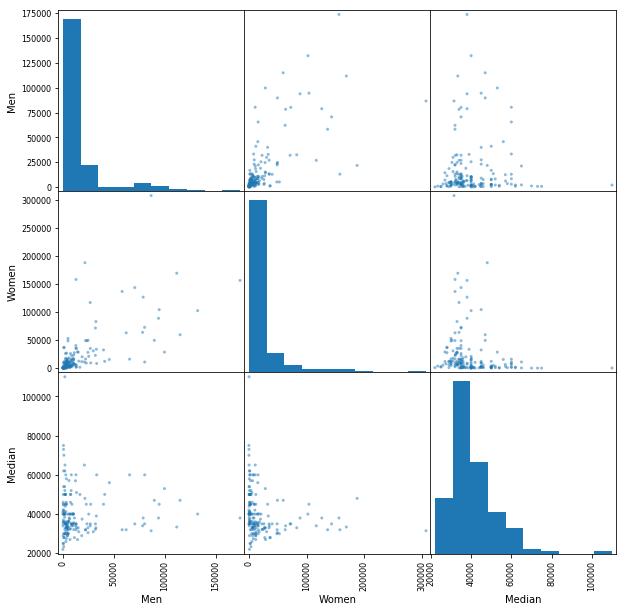

In [81]:
scatter_matrix(recent_grads[["Men","Women", "Median"]], figsize=(10,10))

In [92]:
#sort the most popular female majors
women_popular_sorted = women_popular.sort_values(by="ShareWomen", ascending=False)
women_popular_sorted.shape

(96, 21)

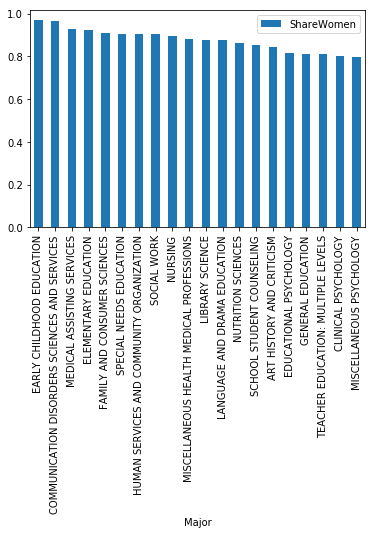

In [87]:
#plot the share of women in the first 20 most popular majors among females
women_popular_sorted[:20].plot.bar(y='ShareWomen', x="Major")

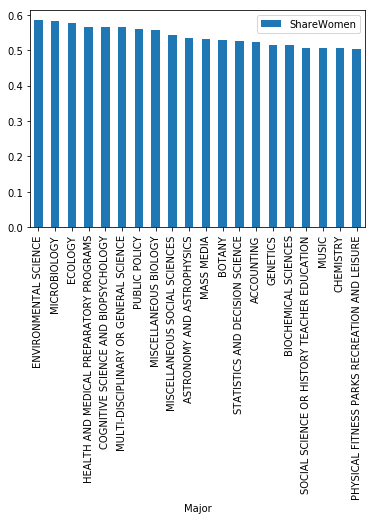

In [93]:
#plot the share of women in the 20 least popular majors among females
women_popular_sorted[76:].plot.bar(y='ShareWomen', x="Major")

Compare the number of men with the number of women in each category of majors.

In [96]:
#describe the series of major category
recent_grads["Major_category"].describe()

count             172
unique             16
top       Engineering
freq               29
Name: Major_category, dtype: object

In [94]:
#list all categories of majors that appear in the dataset
majors = recent_grads["Major_category"].unique()
print(majors)

['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Industrial Arts & Consumer Services' 'Arts'
 'Health' 'Social Science' 'Biology & Life Science' 'Education'
 'Agriculture & Natural Resources' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary']


In [97]:
#create two dictionaries with key being the major category and 
#the value the number of male (dictionary 1: men_category) or female students (dictionary 2:women_category) in them
men_category = pd.Series(recent_grads["Men"].values,index=recent_grads["Major_category"]).to_dict()
women_category = pd.Series(recent_grads["Women"].values,index=recent_grads["Major_category"]).to_dict()

#convert dictinaries to dataframes
men_df = pd.DataFrame(men_category, index=["Men"])
women_df = pd.DataFrame(women_category, index=["Women"])

#combine dataframes
frames =men_df, women_df
gender_df = pd.concat(frames)

#show the combined dataframe
gender_df

,Engineering,Business,Physical Sciences,Law & Public Policy,Computers & Mathematics,Industrial Arts & Consumer Services,Arts,Health,Social Science,Biology & Life Science,Education,Agriculture & Natural Resources,Humanities & Liberal Arts,Psychology & Social Work,Communications & Journalism,Interdisciplinary
Men,4419.0,15204.0,2744.0,80231.0,11431.0,4364.0,14440.0,1225.0,5079.0,3050.0,134.0,404.0,7022.0,931.0,24704.0,2817.0
Women,371.0,28443.0,1299.0,72593.0,6604.0,6146.0,28809.0,37054.0,7841.0,5359.0,964.0,1084.0,11931.0,3695.0,28120.0,9479.0


In [98]:
#transpose the datafram so it an be plotted
gender_df = gender_df.T

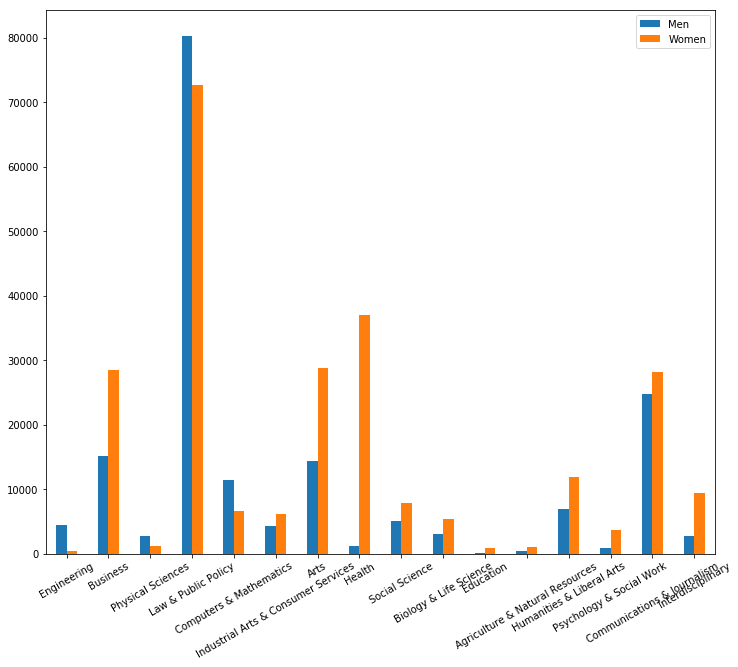

In [100]:
#plot the dataframe of major categories
gender_df.plot.bar(rot=30, figsize =(12,10))

**Observations**
The most popular category for both Genders is Physical Sciences. 
There is one stand out category where there is signifcanly more female graduants than male ones: Industrial Arts & Consumer Services Health.

There are three more categories where female studnets constitute more thn 50% of the total:
* Business
* Arts
* Communications & Journalism, Interdisciplinary

The latter is however the least popular category of the three.

## Exploring dense scatterplots

To better visualize the columns that had dense scatter plots we can use hexagonalbin plots.

We saw dense scatter plots in the following distributions:
* Men/median
* Women/median 
* Median/sample size


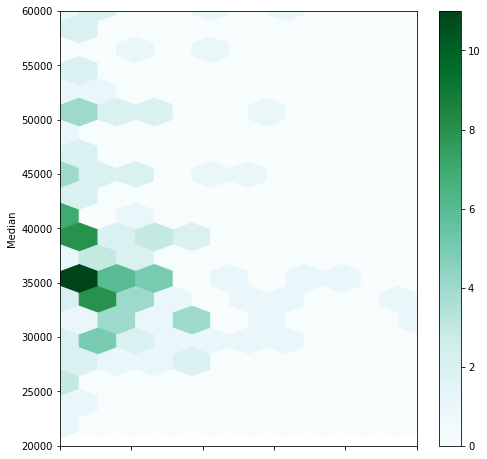

In [128]:
#men vs median zoomed in to the dense part of the distribution
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=40, figsize = (8,8), ylim=(20000,60000), xlim=(0,1000))

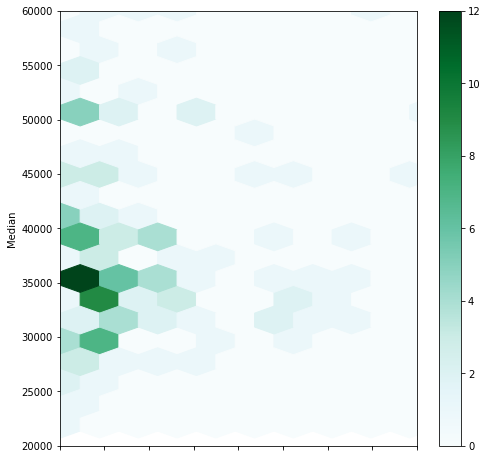

In [113]:
#men vs median zoomed in to the dense part of the distribution
recent_grads.plot.hexbin(x='Men', y='Median', gridsize=40, figsize = (8,8), ylim=(20000,60000),xlim=(0, 40000))

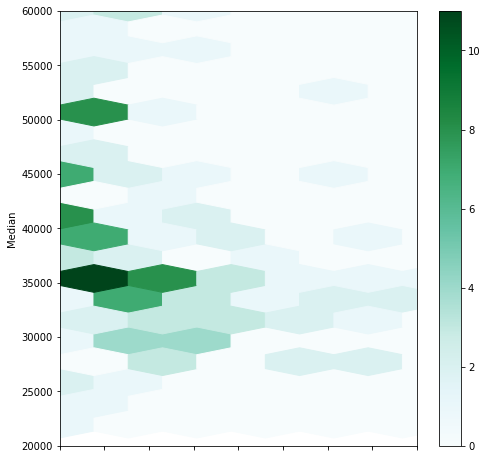

In [120]:
#women vs median zoomed in to the dense part of the distribution
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=40, figsize = (8,8), ylim=(20000,60000),xlim=(0, 40000))